In [6]:
import pandas as pd
import os
import numpy as np
import seaborn as sns 
import plotly.express as px
from sklearn.decomposition import PCA
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.cm as cm
from pathlib import Path


# Use the parent directory of this file for results
# results_dir = os.getcwd()
results_dir = "/net/trapnell/vol1/home/mdcolon/proj/morphseq/results/mcolon/20250924"
data_dir = os.path.join(results_dir, "data")
plot_dir = os.path.join(results_dir, "plots")

print(f"Results directory: {results_dir}")
os.makedirs(plot_dir, exist_ok=True)
os.makedirs(data_dir, exist_ok=True)


morphseq_root = os.environ.get('MORPHSEQ_REPO_ROOT')
morphseq_root = "/net/trapnell/vol1/home/mdcolon/proj/morphseq"
print(f"MORPHSEQ_REPO_ROOT: {morphseq_root}")
os.chdir(morphseq_root)

# from src.functions.embryo_df_performance_metrics import *
from src.functions.spline_morph_spline_metrics import *



Results directory: /net/trapnell/vol1/home/mdcolon/proj/morphseq/results/mcolon/20250924
MORPHSEQ_REPO_ROOT: /net/trapnell/vol1/home/mdcolon/proj/morphseq


In [13]:
new_df =pd.read_csv("/net/trapnell/vol1/home/mdcolon/proj/morphseq/results/mcolon/20250917/data/TZ_df_augmented_20250924.csv")
old_df =pd.read_csv("/net/trapnell/vol1/home/mdcolon/proj/morphseq/results/mcolon/20250917/data/embryo_stats_df.csv")

/tmp/22952982.1.trapnell-short.q/ipykernel_1013252/122124738.py:1: DtypeWarning: Columns (0,11,48,271,272) have mixed types. Specify dtype option on import or set low_memory=False.
  new_df =pd.read_csv("/net/trapnell/vol1/home/mdcolon/proj/morphseq/results/mcolon/20250917/data/TZ_df_augmented_20250924.csv")
/tmp/22952982.1.trapnell-short.q/ipykernel_1013252/122124738.py:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  old_df =pd.read_csv("/net/trapnell/vol1/home/mdcolon/proj/morphseq/results/mcolon/20250917/data/embryo_stats_df.csv")


In [16]:
old_df["experiment_id"] = old_df["experiment_date"].astype(str) + "_old"
new_df["experiment_id"] = new_df["experiment_date"].astype(str) + "_new"

In [ ]:
combined_df = pd.concat([old_df, new_df], ignore_index=True)

combined_df = add_pca_components(combined_df)




,Unnamed: 0,snip_id,embryo_id,experiment_time,experiment_date,temperature,medium,short_pert_name,control_flag,phenotype,...,use_embryo_flag,inferred_stage_hpf,sa_outlier_flag,dead_flag2,source_experiment,image_id,PCA_1,PCA_2,PCA_3,segment_id
0,0.0,20230525_A03_e00_t0001,20230525_A03_e00,594.316650,20230525,22.0,EM,wt_wik,0,wt,...,NaN,NaN,NaN,NaN,NaN,NaN,0.249654,1.483983,-1.474168,NaN
1,1.0,20230525_A03_e00_t0002,20230525_A03_e00,3591.278076,20230525,22.0,EM,wt_wik,0,wt,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.177570,1.439767,-1.818634,NaN
2,2.0,20230525_A03_e00_t0003,20230525_A03_e00,6591.527710,20230525,22.0,EM,wt_wik,0,wt,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.116015,1.533434,-1.991226,NaN
3,3.0,20230525_A03_e00_t0004,20230525_A03_e00,9596.864624,20230525,22.0,EM,wt_wik,0,wt,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.243655,1.507917,-2.021117,NaN
4,4.0,20230525_A03_e00_t0005,20230525_A03_e00,12591.573975,20230525,22.0,EM,wt_wik,0,wt,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.417036,1.401612,-2.175440,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134835,NaN,20250711_H12_e01_t0023,20250711_H12_e01,NaN,20250711,30.0,MC05,NaN,1,tmem67_homozygous,...,True,57.739325,False,False,20250711,20250711_H12_ch00_t0023,1.777087,-0.830113,-0.446983,41.0
134836,NaN,20250711_H12_e01_t0043,20250711_H12_e01,NaN,20250711,30.0,MC05,NaN,1,tmem67_homozygous,...,True,64.364618,False,False,20250711,20250711_H12_ch00_t0043,2.619443,-0.351589,-0.161037,41.0
134837,NaN,20250711_H12_e01_t0019,20250711_H12_e01,NaN,20250711,30.0,MC05,NaN,1,tmem67_homozygous,...,True,56.412034,False,False,20250711,20250711_H12_ch00_t0019,1.563296,-0.937493,-0.306537,41.0
134838,NaN,20250711_H12_e01_t0037,20250711_H12_e01,NaN,20250711,30.0,MC05,NaN,1,tmem67_homozygous,...,True,62.376381,False,False,20250711,20250711_H12_ch00_t0037,2.951701,-0.278496,0.004017,41.0


In [34]:
import importlib
import src.functions.spline_morph_spline_metrics
importlib.reload(src.functions.spline_morph_spline_metrics)
from src.functions.spline_morph_spline_metrics import *

In [35]:
mask = combined_df["experiment_id"].str.contains("20250305", na=False)
subset = combined_df[mask]

fixing naming errors in plate metadta


In [36]:
# Build splines using the proper functions from the imported modules
model_index = 74  # Using same model index as general_exam_plots



# Build splines and segments using the imported function
pert_splines, df_augmented, segment_info_df = build_splines_and_segments(
    df=subset,
    model_index=model_index,
    LocalPrincipalCurveClass=LocalPrincipalCurve,
    bandwidth=0.5,
    max_iter=250,
    tol=1e-3,
    angle_penalty_exp=2,
    early_stage_offset=1.0,
    late_stage_offset=3.0,
    k=50,
    save_dir=data_dir,
    group_by_col="experiment_id",
)

print(f"Built splines:")
print(f"pert_splines shape: {pert_splines.shape}")
print(f"df_augmented shape: {df_augmented.shape}")
print(f"segment_info_df shape: {segment_info_df.shape}")

# Save the splines data
pert_splines.to_csv(os.path.join(data_dir, "TZ_pert_splines_20250924.csv"), index=False)
df_augmented.to_csv(os.path.join(data_dir, "TZ_df_augmented_20250924.csv"), index=False)

Building spline data for each experiment_id...


Creating splines for each experiment_id: 100%|██████████| 2/2 [00:02<00:00,  1.17s/it]


Spline DataFrame 'pert_splines' saved to: /net/trapnell/vol1/home/mdcolon/proj/morphseq/results/mcolon/20250924/data/pert_splines_74_unique.csv
Assigning segments and building segment_info_df...


Processing experiment_id: 100%|██████████| 2/2 [00:15<00:00,  7.95s/it]


Built splines:
pert_splines shape: (1000, 4)
df_augmented shape: (14266, 297)
segment_info_df shape: (100, 16)


In [37]:
# Copy the plot_pca_with_splines function from general_exam_plots
def plot_pca_with_splines(df_points, df_splines, 
                         point_opacity=0.7, 
                         save_dir=None, 
                         downsample_dict=None, 
                         color_dict=None,
                         title="PCA Plot with Splines",
                         min_snip_count=20,
                         phenotypes_of_interest=None,
                         show_splines=True,
                         spline_width=6,
                         group_by_col='genotype',
                         filename=None,
                         color_by=None,  # New parameter for coloring by continuous variable
                         colorscale='viridis'):  # Colorscale for continuous variables
    """Plot PCA points and their splines with customizable options."""
    import plotly.graph_objects as go
    import plotly.express as px
    import os
    
    # Filter by phenotypes of interest first
    if phenotypes_of_interest is not None:
        df_points = df_points[df_points[group_by_col].isin(phenotypes_of_interest)].copy()
        if df_splines is not None:
            df_splines = df_splines[df_splines[group_by_col].isin(phenotypes_of_interest)].copy()
    
    # Filter embryos based on snip count
    embryo_counts = df_points.groupby('embryo_id')['snip_id'].count()
    valid_embryos = embryo_counts[embryo_counts >= min_snip_count].index.tolist()
    
    # Filter out embryos with too few snips
    removed_embryos = set(df_points['embryo_id'].unique()) - set(valid_embryos)
    if removed_embryos:
        print(f"Removed {len(removed_embryos)} embryos with fewer than {min_snip_count} snips.")
    
    # Filter dataframe to include only valid embryos
    filtered_df = df_points[df_points['embryo_id'].isin(valid_embryos)].copy()
    
    # Check if any data remains after filtering
    if filtered_df.empty:
        print("Warning: No data remaining after filtering.")
        fig = go.Figure()
        fig.update_layout(title="No Data Available")
        return fig
    
    # Get unique phenotypes (after filtering)
    phenotypes = filtered_df[group_by_col].unique()
    
    # Create figure
    fig = go.Figure()
    
    # If color_by is specified, color by continuous variable
    if color_by is not None and color_by in filtered_df.columns:
        print(f"Coloring points by {color_by}")
        
        # FIXED: Calculate global color range across ALL data going into plot
        global_min = filtered_df[color_by].min()
        global_max = filtered_df[color_by].max()
        print(f"Global {color_by} range: {global_min:.2f} to {global_max:.2f}")
        
        # Process each phenotype separately to maintain grouping
        for phenotype in phenotypes:
            # Filter points for this phenotype
            points = filtered_df[filtered_df[group_by_col] == phenotype].copy()
            
            # Apply downsampling if specified
            if downsample_dict is not None and phenotype in downsample_dict:
                fraction = downsample_dict[phenotype]
                if 0 < fraction < 1:
                    points = points.sample(frac=fraction, random_state=42)
            
            # FIXED: Create consistent hover text with all information
            hover_text = []
            for _, row in points.iterrows():
                hover_info = (
                    f"<b>{group_by_col.title()}: {row[group_by_col]}</b><br>"
                    f"Embryo ID: {row['embryo_id']}<br>"
                    f"Snip ID: {row['snip_id']}<br>"
                    f"Predicted Stage (hpf): {row['predicted_stage_hpf']:.2f}<br>"
                    f"PCA_1: {row['PCA_1']:.3f}<br>"
                    f"PCA_2: {row['PCA_2']:.3f}<br>"
                    f"PCA_3: {row['PCA_3']:.3f}<br>"
                    f"{color_by}: {row[color_by]:.2f}"
                )
                hover_text.append(hover_info)
            
            # Add points to plot with GLOBAL color scale
            fig.add_trace(
                go.Scatter3d(
                    x=points['PCA_1'],
                    y=points['PCA_2'],
                    z=points['PCA_3'],
                    mode='markers',
                    marker=dict(
                        size=4,
                        color=points[color_by],
                        colorscale=colorscale,
                        opacity=point_opacity,
                        showscale=True,
                        colorbar=dict(title=color_by),
                        cmin=global_min,  # FIXED: Set global color range
                        cmax=global_max   # FIXED: Set global color range
                    ),
                    name=f"{phenotype}",
                    showlegend=True,
                    hovertemplate='%{text}<extra></extra>',
                    text=hover_text
                )
            )
            
            # Add spline for this phenotype
            if show_splines and df_splines is not None:
                spline = df_splines[df_splines[group_by_col] == phenotype]
                if not spline.empty:
                    # Use a solid color for splines when coloring by continuous variable
                    spline_color = px.colors.qualitative.Plotly[list(phenotypes).index(phenotype) % len(px.colors.qualitative.Plotly)]
                    fig.add_trace(
                        go.Scatter3d(
                            x=spline['PCA_1'],
                            y=spline['PCA_2'],
                            z=spline['PCA_3'],
                            mode='lines',
                            line=dict(
                                color=spline_color,
                                width=spline_width
                            ),
                            name=f"{phenotype} (spline)",
                            showlegend=True
                        )
                    )
    
    else:
        # Original behavior: color by group_by_col
        # Create color dictionary if not provided
        if color_dict is None:
            default_colors = [
                '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
                '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
            ]
            color_dict = {phenotype: default_colors[i % len(default_colors)] for i, phenotype in enumerate(phenotypes)}
        
        # Process each phenotype
        for phenotype in phenotypes:
            # Filter points for this phenotype
            points = filtered_df[filtered_df[group_by_col] == phenotype].copy()
            
            # Apply downsampling if specified
            if downsample_dict is not None and phenotype in downsample_dict:
                fraction = downsample_dict[phenotype]
                if 0 < fraction < 1:
                    points = points.sample(frac=fraction, random_state=42)
            
            # Get color for this phenotype
            color = color_dict.get(phenotype, '#1f77b4')
            
            # FIXED: Create consistent hover text with all information
            hover_text = []
            for _, row in points.iterrows():
                hover_info = (
                    f"<b>{group_by_col.title()}: {row[group_by_col]}</b><br>"
                    f"Embryo ID: {row['embryo_id']}<br>"
                    f"Snip ID: {row['snip_id']}<br>"
                    f"Predicted Stage (hpf): {row['predicted_stage_hpf']:.2f}<br>"
                    f"PCA_1: {row['PCA_1']:.3f}<br>"
                    f"PCA_2: {row['PCA_2']:.3f}<br>"
                    f"PCA_3: {row['PCA_3']:.3f}"
                )
                hover_text.append(hover_info)
            
            # Add points to plot
            fig.add_trace(
                go.Scatter3d(
                    x=points['PCA_1'],
                    y=points['PCA_2'],
                    z=points['PCA_3'],
                    mode='markers',
                    marker=dict(
                        size=4,
                        color=color,
                        opacity=point_opacity
                    ),
                    name=f"{phenotype} (points)",
                    showlegend=True,
                    hovertemplate='%{text}<extra></extra>',
                    text=hover_text
                )
            )
            
            # Add spline for this phenotype
            if show_splines and df_splines is not None:
                spline = df_splines[df_splines[group_by_col] == phenotype]
                if not spline.empty:
                    fig.add_trace(
                        go.Scatter3d(
                            x=spline['PCA_1'],
                            y=spline['PCA_2'],
                            z=spline['PCA_3'],
                            mode='lines',
                            line=dict(
                                color=color,
                                width=spline_width
                            ),
                            name=f"{phenotype} (spline)",
                            showlegend=True
                        )
                    )
    
    # Update layout
    fig.update_layout(
        scene=dict(
            xaxis_title='PCA 1',
            yaxis_title='PCA 2',
            zaxis_title='PCA 3'
        ),
        title=title,
        margin=dict(l=0, r=0, b=0, t=40),
        legend=dict(
            x=0.01,
            y=0.99,
            bordercolor="Black",
            borderwidth=1
        )
    )
    
    # Save figure if save_dir is provided
    if save_dir is not None:
        if not os.path.exists(save_dir):
            os.makedirs(save_dir)
        
        # Use custom filename if provided, otherwise default to title-based name
        if filename is not None:
            save_filename = filename if filename.endswith('.html') else f"{filename}.html"
        else:
            save_filename = f"{title.replace(' ', '_')}.html"
            
        save_path = os.path.join(save_dir, save_filename)
        fig.write_html(save_path)
        print(f"Plot saved to: {save_path}")
    
    return fig

In [ ]:
# Now use the plot function with the splines data
# Create color dictionary for all genotypes with auto-scaling palette
import plotly.express as px

genotypes = combined_df['genotype'].unique().tolist()
print(f"Found {len(genotypes)} genotypes: {genotypes}")

# Generate enough colors for all genotypes
if len(genotypes) <= len(px.colors.qualitative.Plotly):
    colors = px.colors.qualitative.Plotly[:len(genotypes)]
else:
    # If we need more colors, cycle through multiple palettes
    all_colors = (px.colors.qualitative.Plotly + 
                  px.colors.qualitative.Set1 + 
                  px.colors.qualitative.Set2)
    colors = all_colors[:len(genotypes)]

color_dict = {genotype: colors[i] for i, genotype in enumerate(genotypes)}
print(f"Generated color palette for {len(color_dict)} genotypes")

# Create the plot with splines colored by genotype (original)
fig1 = plot_pca_with_splines(
    df_points=df_augmented,
    df_splines=pert_splines,
    point_opacity=0.65,
    color_dict=color_dict,
    save_dir=plot_dir,
    title="TZ Experiments with Splines by Genotype",
    phenotypes_of_interest=genotypes,  # Use all genotypes instead of top 6
    show_splines=True,
    spline_width=15,
    min_snip_count=10,  # Lower threshold for TZ data
    group_by_col='experiment_id',  # Specify we're using genotype column
    filename='batcheffect_for_20250305'  # Custom filename
)

# # Create a second plot colored by predicted_stage_hpf
# fig2 = plot_pca_with_splines(
#     df_points=df_augmented,
#     df_splines=pert_splines,
#     point_opacity=0.65,
#     save_dir=plot_dir,
#     title="TZ Experiments Colored by Developmental Stage",
#     phenotypes_of_interest=genotypes,  # Use all genotypes
#     show_splines=True,
#     spline_width=15,
#     min_snip_count=10,
#     group_by_col='genotype',
#     color_by='predicted_stage_hpf',  # Color by developmental stage
#     colorscale='plasma',  # Different colorscale
#     filename='stage_colored_plot_20250924'  # Custom filename
# )

fig1.show()
fig2.show()
print(f"Created plots with all {len(genotypes)} genotypes and saved to {plot_dir}")



Found 12 genotypes: [nan, 'cep290_heterozygous', 'cep290_wildtype', 'cep290_unknown', 'cep290_homozygous', 'b9d2_homozygous', 'b9d2_heterozygous', 'b9d2_unknown', 'b9d2_wildtype', 'tmem67_heterozygous', 'tmem67_homozygous', 'tmem67_wildtype']
Generated color palette for 12 genotypes


KeyError: 'genotype'

In [40]:
fig3 = plot_pca_with_splines(
    df_points=df_augmented,
    df_splines=pert_splines,
    point_opacity=0.65,
    save_dir=plot_dir,
    title="TZ Experiments Colored by Developmental Stage",
    phenotypes_of_interest=None,  # Use all genotypes
    show_splines=False,
    spline_width=15,
    min_snip_count=10,
    group_by_col='experiment_id',
    # color_by='predicted_stage_hpf',  # Color by developmental stage
    # colorscale='plasma',  # Different colorscale
    filename='TZ_experiment_colored_plot_20250924'  # Custom filename
)

Removed 3 embryos with fewer than 10 snips.
Plot saved to: /net/trapnell/vol1/home/mdcolon/proj/morphseq/results/mcolon/20250924/plots/TZ_experiment_colored_plot_20250924.html


# going to investigate difreing embryo number in old vs new exeprimetn


In [50]:
new_b4 = pd.read_csv("/net/trapnell/vol1/home/mdcolon/proj/morphseq/morphseq_playground/metadata/build04_output/qc_staged_20250305.csv")
new_b4.shape

(9445, 71)

In [54]:
new_b4.columns


Index(['image_id', 'embryo_id', 'snip_id', 'frame_index', 'area_px',
       'bbox_x_min', 'bbox_y_min', 'bbox_x_max', 'bbox_y_max',
       'mask_confidence', 'exported_mask_path', 'experiment_id', 'video_id',
       'is_seed_frame', 'Height (um)', 'Height (px)', 'Width (um)',
       'Width (px)', 'BF Channel', 'Objective', 'Time (s)', 'Time Rel (s)',
       'height_um', 'height_px', 'width_um', 'width_px', 'bf_channel',
       'objective', 'raw_time_s', 'relative_time_s', 'microscope',
       'nd2_series_num', 'medium', 'genotype', 'chem_perturbation',
       'start_age_hpf', 'embryos_per_well', 'temperature', 'well_qc_flag',
       'well', 'time_int', 'time_string', 'sam2_qc_flags', 'sam2_qc_flag',
       'xpos', 'ypos', 'fraction_alive', 'region_label', 'experiment_date',
       'well_id', 'predicted_stage_hpf', 'perimeter_px', 'centroid_x_px',
       'centroid_y_px', 'area_um2', 'perimeter_um', 'centroid_x_um',
       'centroid_y_um', 'frame_flag', 'no_yolk_flag', 'focus_flag',
    

In [69]:
old_df["video_id"] = old_df["embryo_id"].str.replace(r"_e\d+$", "", regex=True)
# old_df["image_id"].head

In [70]:
old_df_20250305 = old_df[old_df["experiment_id"] == "20250305_old"]
old_df_20250305


,Unnamed: 0,snip_id,embryo_id,experiment_time,experiment_date,temperature,medium,short_pert_name,control_flag,phenotype,...,UMAP_02_3,UMAP_00_bio_3,UMAP_01_bio_3,UMAP_02_bio_3,UMAP_00_n_3,UMAP_01_n_3,UMAP_02_n_3,experiment_id,image_id,video_id
96210,96210,20250305_A01_e00_t0098,20250305_A01_e00,48113.475015,20250305,30.0,EM,cep290_het_cep290,0,uncertain,...,3.018773,-0.763541,4.761819,-0.658327,9.298806,1.601211,10.293647,20250305_old,20250305_A01,20250305_A01
96211,96211,20250305_A01_e00_t0099,20250305_A01_e00,48601.506828,20250305,30.0,EM,cep290_het_cep290,0,uncertain,...,3.154112,-0.730415,5.463937,0.285649,9.490348,1.528609,9.425093,20250305_old,20250305_A01,20250305_A01
96212,96212,20250305_A01_e00_t0100,20250305_A01_e00,49093.530730,20250305,30.0,EM,cep290_het_cep290,0,uncertain,...,3.041688,-1.132644,5.222059,-0.523924,9.292422,1.576963,10.128618,20250305_old,20250305_A01,20250305_A01
96213,96213,20250305_A01_e00_t0101,20250305_A01_e00,49589.136796,20250305,30.0,EM,cep290_het_cep290,0,uncertain,...,2.998885,-1.200929,5.498043,-0.473242,9.207326,1.746751,10.328729,20250305_old,20250305_A01,20250305_A01
96214,96214,20250305_A01_e00_t0102,20250305_A01_e00,50085.879925,20250305,30.0,EM,cep290_het_cep290,0,uncertain,...,2.981893,-1.129033,5.606740,-0.474013,9.141162,1.769835,10.419359,20250305_old,20250305_A01,20250305_A01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107512,107512,20250305_H12_e00_t0330,20250305_H12_e00,162760.651623,20250305,30.0,MC1,wt_cep290,0,wt,...,8.339406,8.236109,5.657591,5.544200,10.945767,12.415935,8.924403,20250305_old,20250305_H12,20250305_H12
107513,107513,20250305_H12_e00_t0331,20250305_H12_e00,163252.568388,20250305,30.0,MC1,wt_cep290,0,wt,...,-3.197492,7.408601,5.685382,5.339302,3.257926,7.556348,0.341117,20250305_old,20250305_H12,20250305_H12
107514,107514,20250305_H12_e00_t0332,20250305_H12_e00,163744.289463,20250305,30.0,MC1,wt_cep290,0,wt,...,-3.197561,7.398356,5.683578,5.331314,3.257704,7.556888,0.340840,20250305_old,20250305_H12,20250305_H12
107515,107515,20250305_H12_e00_t0333,20250305_H12_e00,164233.901811,20250305,30.0,MC1,wt_cep290,0,wt,...,8.340215,8.235836,5.655251,5.535123,10.941903,12.420999,8.927093,20250305_old,20250305_H12,20250305_H12


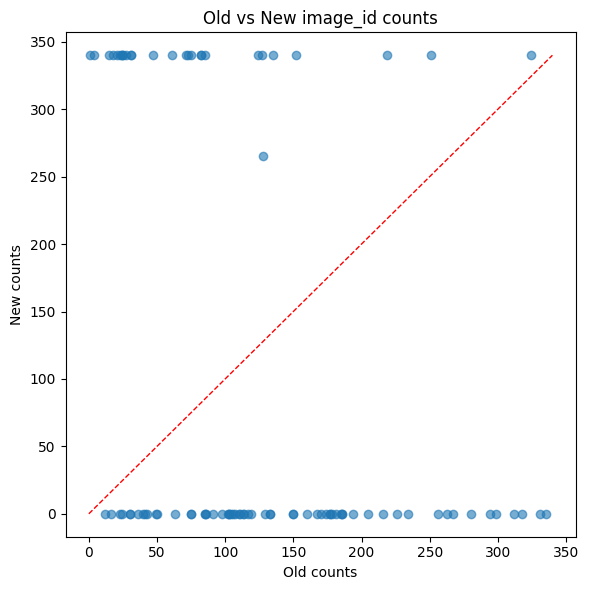

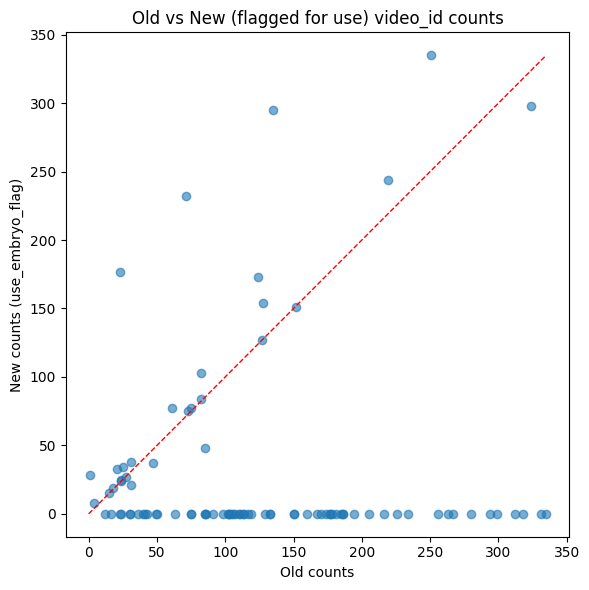

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Value counts
old_counts = old_df_20250305["video_id"].value_counts()
new_counts = new_b4["video_id"].value_counts()
new_counts_flagged = new_b4.loc[new_b4["use_embryo_flag"], "video_id"].value_counts()

# Align into a DataFrame
compare_df = pd.DataFrame({
    "old": old_counts,
    "new": new_counts,
    "new_flagged": new_counts_flagged
}).fillna(0).astype(int)

# Scatter 1: old vs new
plt.figure(figsize=(6, 6))
plt.scatter(compare_df["old"], compare_df["new"], alpha=0.6)
plt.plot([0, compare_df[["old","new"]].max().max()],
         [0, compare_df[["old","new"]].max().max()],
         "r--", lw=1)  # 1:1 reference line
plt.xlabel("Old counts")
plt.ylabel("New counts")
plt.title("Old vs New video_id counts")
plt.tight_layout()
plt.show()

# Scatter 2: old vs new_flagged
plt.figure(figsize=(6, 6))
plt.scatter(compare_df["old"], compare_df["new_flagged"], alpha=0.6)
plt.plot([0, compare_df[["old","new_flagged"]].max().max()],
         [0, compare_df[["old","new_flagged"]].max().max()],
         "r--", lw=1)  # 1:1 reference line
plt.xlabel("Old counts")
plt.ylabel("New counts (use_embryo_flag)")
plt.title("Old vs New (flagged for use) video_id counts")
plt.tight_layout()
plt.show()

In [74]:
# Reuse the compare_df from before
compare_df = pd.DataFrame({
    "old": old_counts,
    "new": new_counts,
    "new_flagged": new_counts_flagged
}).fillna(0).astype(int)

# Compute differences
compare_df["diff_new"] = compare_df["old"] - compare_df["new"]
compare_df["diff_flagged"] = compare_df["old"] - compare_df["new_flagged"]

# Rank by missingness after flag
ranked_missing = compare_df.sort_values("diff_flagged", ascending=False)

# Show top 20 most missing video_ids
print(ranked_missing.head(20)[["old", "new_flagged", "diff_flagged"]])

# Rank by missingness after flag
ranked_missing = compare_df.sort_values("diff_flagged", ascending=True)

# Show top 20 most missing video_ids
print(ranked_missing.head(20)[["old", "new_flagged", "diff_flagged"]])

              old  new_flagged  diff_flagged
video_id                                    
20250305_H12  335            0           335
20250305_F12  331            0           331
20250305_D06  318            0           318
20250305_C09  312            0           312
20250305_A10  299            0           299
20250305_H08  294            0           294
20250305_F07  280            0           280
20250305_A11  267            0           267
20250305_D12  263            0           263
20250305_A07  256            0           256
20250305_C08  234            0           234
20250305_E05  226            0           226
20250305_G09  216            0           216
20250305_D11  205            0           205
20250305_B09  194            0           194
20250305_A06  186            0           186
20250305_B07  186            0           186
20250305_C10  185            0           185
20250305_A05  181            0           181
20250305_G07  178            0           178
          